In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)
pd.options.mode.chained_assignment = None

import random
random.seed(68)

from pandarallel import pandarallel
pandarallel.initialize(nb_workers=20)

from rdkit import Chem
from rdkit.Chem import PandasTools

import sys
sys.path.append('../')
from standardization_process import *

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


# Data Summary

In [2]:
Chembl = pd.read_csv('../data/data_mining_results/Ames/chembl_ames_data_mining.csv')
benchmark = PandasTools.LoadSDF('../data/raw_data/ames/benchmark/AMES.sdf')
Xu_data = pd.read_csv('../data/raw_data/ames/Xu/xu.csv')
Efsa_data = pd.read_excel('../data/raw_data/ames/QSAR/EFSA/EFSA.xlsx',names=['Smiles','cell_type','s9','Ames'])
Ecva_data = pd.read_excel('../data/raw_data/ames/QSAR/ECVA/ECVA.xlsx',names=['Smiles','s9','Ames'])
Ecva_data['source'] = 'ECVA'

[17:22:36] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 15 ignored.
[17:22:36] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 18 ignored.
[17:22:36] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 20 ignored.
[17:22:36] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 17 ignored.
[17:22:36] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 4 ignored.
[17:22:36] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 5 ignored.
[17:22:36] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 1 ignored.
[17:22:36] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 4 ignored.
[17:22:36] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 6 ignored.
[17:22:36] Warning: ambi

In [3]:
Chembl = Chembl[~Chembl['Ames experiment'].isna()]

In [4]:
Chembl.shape

(6051, 22)

In [5]:
Chembl['Assay ChEMBL ID'].nunique()

1269

In [6]:
all_data = pd.concat([benchmark,Xu_data,Ecva_data,Efsa_data],ignore_index=True)
all_data.shape

(27758, 12)

# Load Data

## Chembl

In [7]:
Chembl = pd.read_csv('../data/data_mining_results/Ames/chembl_ames_data_mining.csv')
Chembl = process_stage_1(Chembl,'Smiles')

100%|████████████████████████████████████| 9534/9534 [00:00<00:00, 10164.48it/s]


Smiles_check
SANITIZE_NONE    9534
Name: count, dtype: int64


100%|██████████████████████████████████| 9534/9534 [00:00<00:00, 1130576.60it/s]
9534it [00:00, 13111.28it/s]


Metal in Smiles amount: 3


100%|█████████████████████████████████████| 9531/9531 [00:01<00:00, 9032.76it/s]


In [8]:
Chembl.columns

Index(['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Relation',
       'Standard Value', 'Standard Units', 'Assay ChEMBL ID',
       'Assay Description', 'Assay Type', 'BAO Format ID', 'BAO Label',
       'Document ChEMBL ID', 'Source Description', 'Document Journal',
       'Document Year', 'Comment', 'Concentration/Dosage Levels',
       'Temperature Range', 'Time Duration', 'Metabolic Activation Presence',
       'Cell/Tissue Type or Organism Used', 'Ames experiment', 'Smiles_check',
       'Smiles_removesalt', 'Smiles_unify'],
      dtype='object')

In [9]:
Chembl = Chembl[~Chembl['Ames experiment'].isna()]
Chembl = Chembl[Chembl['Ames experiment']]

In [10]:
for col in [ 'Concentration/Dosage Levels', 'Temperature Range',
       'Time Duration', 'Metabolic Activation Presence',
       'Cell/Tissue Type or Organism Used', 'Ames experiment']:
    display(Chembl[col].value_counts(dropna=False))

Concentration/Dosage Levels
NaN                    1487
0.312 to 5 mg/plate     190
1.28 to 128 uM           64
up to 5000 ug/plate      63
5000 lg/plate            54
                       ... 
36 ng/plate               2
313 ng/plate              2
8 umol/kg                 2
0.25 to 240 ug/well       2
2 mg/kg                   2
Name: count, Length: 91, dtype: int64

Temperature Range
NaN        2614
37 degC      78
323 K         4
Name: count, dtype: int64

Time Duration
NaN                                                                                                  1755
48 hrs                                                                                                181
preincubated for 20 mins                                                                              100
after 48 hrs                                                                                           82
4 hrs                                                                                                  77
44 hrs                                                                                                 76
after 72 hrs                                                                                           60
for 3 days                                                                                             54
after 1 hr                                                                                             46
after 90 mins                   

Metabolic Activation Presence
NaN                                                 981
presence of rat liver S9 fraction                   238
absence of S9 fraction                              167
presence of S9 fraction                             155
liver S9 fraction                                   128
rat liver S9 fraction                               115
absence of liver S9 mixture                         100
presence of liver S9 mixture                         90
absence of liver S9 fraction                         66
absence of rat liver S9 fraction                     63
S9 fractions                                         60
presence of liver S9 fraction                        57
absence of S9 fractions                              48
absence of rat S9 fraction                           46
S9 liver fraction                                    32
absence of S9 liver fraction                         32
rat S9 fraction                                      28
presence of S9 mic

Cell/Tissue Type or Organism Used
Salmonella typhimurium TA98                   582
Salmonella typhimurium TA100                  452
Salmonella typhimurium                        306
Salmonella typhimurium TA1535                 163
Salmonella typhimurium TA1537                 127
                                             ... 
Salmonella Typhimurium WP2 uvrA (pKM 101)       2
New Zealand rabbit                              2
Cunninghamella bertholletiae UTHSC 04-2581      2
Salmonella Typhimurium WP2uvrApKM101            2
Salmonella Typhimurium Genox T104(recN2-4)      2
Name: count, Length: 83, dtype: int64

Ames experiment
True    2696
Name: count, dtype: int64

In [11]:
Chembl['Comment'].value_counts(dropna=False)

Comment
Non-toxic                1006
Non-Toxic                 998
Toxic                     415
Not Active                109
Not Determined             87
Active                     73
Dose-dependent effect       6
Not toxic                   2
Name: count, dtype: int64

In [12]:
Chembl  = Chembl[Chembl['Comment'].isin(['Non-toxic','Non-Toxic','Toxic'])]

In [13]:
Chembl['value'] = Chembl['Comment'].apply(lambda x: 1 if x == 'Toxic' else 0)

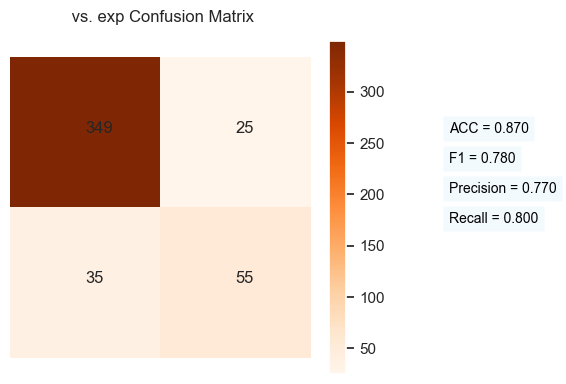

In [14]:
plot_classification_diagram(Chembl,['Smiles_unify'], 'value')

In [15]:
Chembl['Metabolic Activation Presence'] = Chembl['Metabolic Activation Presence'].fillna('unknonwn')
Chembl['s9'] = Chembl['Metabolic Activation Presence'].apply(lambda x: 1 if 'presence' in x else 0)

In [16]:
Chembl['cell_type']= Chembl['Cell/Tissue Type or Organism Used'].copy()
Chembl['cell_type'] = Chembl['cell_type'].fillna('none')

In [17]:
Chembl = Chembl[Chembl['cell_type'] != 'none']

In [18]:
# Chembl['value_']  = Chembl['Standard Value'].map(lambda x: 0 if x < 0 else 1)

In [19]:
Chembl['source'] = Chembl['Assay ChEMBL ID']

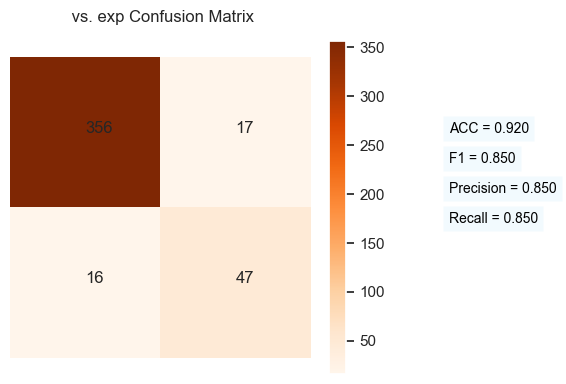

In [20]:
plot_classification_diagram(Chembl,['Smiles_unify','cell_type','s9'], 'value')

In [21]:
# Chembl['value'] = Chembl['Smiles'].map(Chembl.groupby(['Smiles']).apply(lambda x: x['value_'].max() ).to_dict())

In [22]:
Chembl = Chembl[['Smiles','value','cell_type','s9','source']]

## Benchmark

In [23]:
from rdkit.Chem import PandasTools

In [24]:
benchmark = PandasTools.LoadSDF('../data/raw_data/ames/benchmark/AMES.sdf')

[17:23:06] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 15 ignored.
[17:23:06] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 18 ignored.
[17:23:06] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 20 ignored.
[17:23:06] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 17 ignored.
[17:23:06] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 4 ignored.
[17:23:06] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 5 ignored.
[17:23:06] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 1 ignored.
[17:23:06] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 4 ignored.
[17:23:06] Warning: ambiguous stereochemistry - zero-length (or near zero-length) bond - at atom 6 ignored.
[17:23:06] Warning: ambi

In [25]:
benchmark.shape

(6511, 6)

In [26]:
benchmark.head()

,Name,Smiles,Property,Canonical_Smiles,ID,ROMol
0,ames0001,O=C1NC(=O)C(=N#N)C=N1,1,O=C1NC(=O)C(=N#N)C=N1,ames0001,<rdkit.Chem.rdchem.Mol object at 0x141901c40>
1,ames0002,Cc1cccc(c1C)N(=O)=O,1,Cc1cccc(c1C)N(=O)=O,ames0002,<rdkit.Chem.rdchem.Mol object at 0x141902650>
2,ames0003,OC1C=Cc2c(ccc3c(Br)c4ccccc4cc23)C1O,1,OC1C=Cc2c(ccc3c(Br)c4ccccc4cc23)C1O,ames0003,<rdkit.Chem.rdchem.Mol object at 0x141903920>
3,ames0004,Cc1cc2c(nc(N)n2C)c3ncc(nc13)c4ccccc4,1,Cc1cc2c(nc(N)n2C)c3ncc(nc13)c4ccccc4,ames0004,<rdkit.Chem.rdchem.Mol object at 0x141900510>
4,ames0005,Oc1cc2c3ccccc3ccc2c4ccccc14,1,Oc1cc2c3ccccc3ccc2c4ccccc14,ames0005,<rdkit.Chem.rdchem.Mol object at 0x1419013f0>


In [27]:
benchmark = benchmark.loc[:,['Smiles','Property']]
benchmark['source'] = 'Benchmark'
benchmark['cell_type'] = None
benchmark['S9'] = -1

In [28]:
benchmark.head()

,Smiles,Property,source,cell_type,S9
0,O=C1NC(=O)C(=N#N)C=N1,1,Benchmark,None,-1
1,Cc1cccc(c1C)N(=O)=O,1,Benchmark,None,-1
2,OC1C=Cc2c(ccc3c(Br)c4ccccc4cc23)C1O,1,Benchmark,None,-1
3,Cc1cc2c(nc(N)n2C)c3ncc(nc13)c4ccccc4,1,Benchmark,None,-1
4,Oc1cc2c3ccccc3ccc2c4ccccc14,1,Benchmark,None,-1


In [29]:
benchmark.columns = ['Smiles','value','source','cell_type','s9']

In [30]:
benchmark.head()

,Smiles,value,source,cell_type,s9
0,O=C1NC(=O)C(=N#N)C=N1,1,Benchmark,None,-1
1,Cc1cccc(c1C)N(=O)=O,1,Benchmark,None,-1
2,OC1C=Cc2c(ccc3c(Br)c4ccccc4cc23)C1O,1,Benchmark,None,-1
3,Cc1cc2c(nc(N)n2C)c3ncc(nc13)c4ccccc4,1,Benchmark,None,-1
4,Oc1cc2c3ccccc3ccc2c4ccccc14,1,Benchmark,None,-1


<Axes: xlabel='value'>

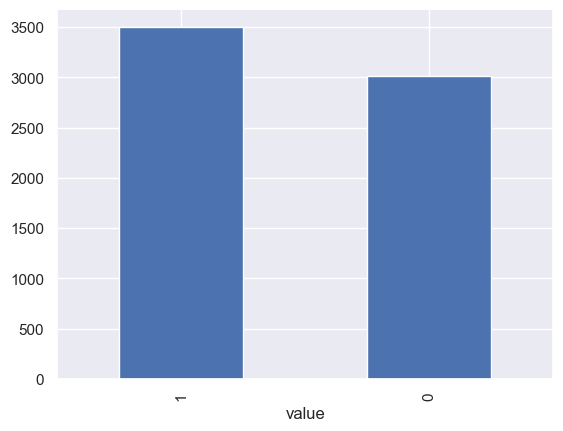

In [31]:
benchmark['value'].value_counts().plot(kind='bar')

## Xu et al.

In [32]:
Xu_data = pd.read_csv('../data/raw_data/ames/Xu/xu.csv')

In [33]:
Xu_data.head()

,SMILES,Labels
0,[O-][N+](=O)c1ccc2ccc3ccc(c4c5ccccc5c1c2c34)[N...,mutagens
1,[O-][N+](=O)c1c2CCCCc2c3ccc4cccc5ccc1c3c45,mutagens
2,O=C1c2ccccc2C(=O)c3c1ccc4c3[nH]c5c6C(=O)c7cccc...,non-mutagens
3,NNC(=O)CNC(=O)C=N#N,mutagens
4,O=C1NC(=O)C(C=N1)=N#N,mutagens


In [34]:
Xu_data.shape

(7617, 2)

In [35]:
Xu_data.drop_duplicates(inplace=True)

In [36]:
Xu_data.shape

(7617, 2)

In [37]:
Xu_data['cell_type'] = None
Xu_data['s9'] = -1
Xu_data['source'] = 'Xu'

In [38]:
Xu_data.head()

,SMILES,Labels,cell_type,s9,source
0,[O-][N+](=O)c1ccc2ccc3ccc(c4c5ccccc5c1c2c34)[N...,mutagens,None,-1,Xu
1,[O-][N+](=O)c1c2CCCCc2c3ccc4cccc5ccc1c3c45,mutagens,None,-1,Xu
2,O=C1c2ccccc2C(=O)c3c1ccc4c3[nH]c5c6C(=O)c7cccc...,non-mutagens,None,-1,Xu
3,NNC(=O)CNC(=O)C=N#N,mutagens,None,-1,Xu
4,O=C1NC(=O)C(C=N1)=N#N,mutagens,None,-1,Xu


In [39]:
Xu_data.columns = ['Smiles','value','cell_type','s9','source']

In [40]:
Xu_data['value' ] = Xu_data['value' ].apply(lambda x: 1 if x == 'mutagens' else 0)

## EFSA

In [41]:
Efsa_data = pd.read_excel('../data/raw_data/ames/QSAR/EFSA/EFSA.xlsx',names=['Smiles','cell_type','s9','Ames'])

In [42]:
Efsa_data.head()

,Smiles,cell_type,s9,Ames
0,C[C@H]1[C@@H](SC(=O)N1C(=O)NC1CCCCC1)c1ccc(Cl)cc1,WP2 Uvr A PKM 101,With S9,Negative
1,C[C@H]1[C@@H](SC(=O)N1C(=O)NC1CCCCC1)c1ccc(Cl)cc1,WP2 Uvr A PKM 101,Without S9,Negative
2,C[C@H]1[C@@H](SC(=O)N1C(=O)NC1CCCCC1)c1ccc(Cl)cc1,TA 100,With S9,Negative
3,C[C@H]1[C@@H](SC(=O)N1C(=O)NC1CCCCC1)c1ccc(Cl)cc1,TA 1535,With S9,Negative
4,C[C@H]1[C@@H](SC(=O)N1C(=O)NC1CCCCC1)c1ccc(Cl)cc1,TA 1537,With S9,Negative


In [43]:
Efsa_data['s9'].value_counts()

s9
With S9       5606
Without S9    5585
No Data         33
Name: count, dtype: int64

In [44]:
def s9_map(x):
    if x == 'With S9':
        return 1
    elif x == 'Without S9':
        return 0
    else:
        return -1
Efsa_data['s9'] = Efsa_data['s9'].apply(lambda x: 1 if x =='With S9' else 0)

In [45]:
Efsa_data['value'] = Efsa_data['Ames'].apply(lambda x: 0 if x =='Negative' else 1)

In [46]:
Efsa_data['source'] = 'EFSA'

In [47]:
Efsa_data = Efsa_data[['Smiles','value','cell_type','s9','source']]

In [48]:
Efsa_data.drop_duplicates(inplace=True)

In [49]:
Efsa_data.shape

(7305, 5)

## ECVA

In [50]:
Ecva_data = pd.read_excel('../data/raw_data/ames/QSAR/ECVA/ECVA.xlsx',names=['Smiles','s9','Ames'])
Ecva_data['source'] = 'ECVA'
Ecva_data.head()

,Smiles,s9,Ames,source
0,O=Cc1ccco1,No S9 Info,Negative,ECVA
1,O=Cc1ccco1,No S9 Info,Positive,ECVA
2,CCOP(=S)(OCC)Oc1nc(Cl)n(n1)C(C)C,No S9 Info,Positive,ECVA
3,CCOP(=S)(OCC)Oc1nc(Cl)n(n1)C(C)C,No S9 Info,Positive,ECVA
4,O=NN1CCC[C@H]1c1cccnc1,No S9 Info,Positive,ECVA


In [51]:
Ecva_data['s9'].value_counts()

s9
No S9 Info    1687
Without S9     360
With S9        358
Name: count, dtype: int64

In [52]:
def s9_map(x):
    if x == 'With S9':
        return 1
    elif x == 'Without S9':
        return 0
    else:
        return -1
Ecva_data['s9'] = Ecva_data['s9'].apply(lambda x: 1 if x =='With S9' else 0)

In [53]:
Ecva_data['value'] = Ecva_data['Ames'].apply(lambda x: 0 if x =='Negative' else 1)

In [54]:
Ecva_data.shape

(2406, 5)

In [55]:
Ecva_data.drop_duplicates(inplace=True)

In [56]:
Ecva_data.shape

(1317, 5)

In [57]:
Ecva_data['cell_type'] = None

In [58]:
Ecva_data = Ecva_data[['Smiles','value','cell_type','s9','source']]

# Concat all data

In [59]:
all_data = pd.concat([benchmark,Xu_data,Ecva_data,Efsa_data,Chembl],ignore_index=True)

In [60]:
all_data[all_data['Smiles'].isna()]

,Smiles,value,source,cell_type,s9


In [61]:
all_data['source'].nunique()

647

In [62]:
all_data.shape

(25167, 5)

In [ ]:
all_data = process_stage_1(all_data,'Smiles')

[17:23:24] Explicit valence for atom # 12 N, 4, is greater than permitted
[17:23:24] SMILES Parse Error: unclosed ring for input: 'CC(C)[C@@H]1NC(=O)[C@@H](NC(=O)C2=C(N)C(=O)C(=C3Oc4c(C)ccc(C(=O)N[C@H]5[C@@H](C)OC(=O)[C@@H](C(C)C)N(C)C(=O)CN(C)C(=O)[C@@H]6CCCN6C(=O)[C@@H](NC5=O)C(C)C)c4N=C23)C)[C@H](C)OC(=O)[C@H](C(C)C)N(C)C(=O)C
[17:23:24] Explicit valence for atom # 15 N, 4, is greater than permitted
N(C)C(=O)[C@@H]7CCCN7C1=O'
[17:23:24] SMILES Parse Error: extra open parentheses for input: 'C[C@@H](O)[C@H](NC(=O)[C@H](C)[C@H](O)[C@H](C)NC(=O)[C@@H](NC(=O)c1nc(nc(N)c1C)[C@H](CC(=O)N)NC[C@H](N)C(=O)N)[C@@H](O[C@H]2O[C@@H](CO)[C@H](O)[C@@H](O)[C@@H]2O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](OC(=O)N)
[17:23:24] Explicit valence for atom # 6 N, 4, is greater than permitted
[C@H]3O)c4c[nH]cn4)C(=O)NCCc5nc(cs5)c6nc(cs6)C(=O)NCCCN[C@H](C)c7ccccc7'
[17:23:24] Explicit valence for atom # 10 N, 4, is greater than permitted
[17:23:24] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:23:

In [ ]:
all_data['property'] = 'ames'

In [ ]:
all_data = all_data[['Smiles_unify','Smiles','value','source','property','cell_type','s9']]

In [ ]:
all_data

In [ ]:
all_data.to_csv('../data/data_processing_result/ames_preprocessing_finished.csv',index=False)